<img src="img/insight.svg" style="width: 300px"><br>
<font color='#544640'>
<center><i>Engineering Summit 2019</i></center>
<center><i>Denver, Colorado</i></center></font><br>
<center><i><font color='#544640' size='1'>Author: Victor Aranda</font></i></center></font>
<center><i><font color='#B81590' size='1'>victor.aranda@insight.com</font></i></center></font>
<hr>

# <font color="#D21087">Artificial Neural Networks</font>

<font color='#544640'>There are fewer things hotter than ***neural networks*** and ***deep-learning*** these days, although how much of that is just the hype cycle at work is yet to be determined. It would seem that this trend is not just another flash-in-the-pan innovation. Machine Learning, powered by modern compute infrastructure, has become something on the order of the transistor in terms of how much it can potentially change our world.

>A neural network is a network or circuit of neurons, or in a modern sense, an artificial neural network, composed of artificial neurons or nodes. Thus a neural network is either a biological neural network, made up of real biological neurons, or an artificial neural network, for solving artificial intelligence (AI) problems. The connections of the biological neuron are modeled as weights. A positive weight reflects an excitatory connection, while negative values mean inhibitory connections. All inputs are modified by a weight and summed. This activity is referred as a linear combination. Finally, an activation function controls the amplitude of the output. For example, an acceptable range of output is usually between 0 and 1, or it could be −1 and 1.<br><br>

https://en.wikipedia.org/wiki/Neural_network<br><br>

https://en.wikipedia.org/wiki/Artificial_neural_network<br><br>

</font>

<font color='#544640'>The principles of Artificial Neural Networks and Artificial Neurons are inspired directly by biology:<br><br>

<center><img src='./img/neuron_anatomy.png' width=600></center>
<center>Anatomy of a biological neuron</center>
<center><font size=1>Image credit: Wikipedia</font></center><br><br>


<center><img src='./img/neurons1.gif' width=600></center>
<center>Artist's conception</center><br><br>

<center><img src='./img/neurons2.gif' width=600></center>
<center>Conceptual representation</center><br><br>


<center><img src='./img/neurons3.gif' width=600></center>
<center>Actual mouse neurons communicating with each other<br><font size=1>Rockefeller University; <i>Fast volumetric calcium imaging across<br> multiple cortical layers using sculpted light</i>, Nature Methods<br><a href='http://dx.doi.org/10.1038/nmeth.4040'>DOI: 10.1038/nmeth.4040</a></font></center><br><br>


There are many thousands of books and articles written on this topic - go explore!

</font>

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

In [1]:
# environment setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

### <font color="#D21087">Perceptron</font>

<font color='#544640'>The concept of a self-updating ***perceptron***, which is just a single artificial neuron, has been around for a long time, first arising theoretically in 1873 and later developed by computer scientists and psychologists in the 1940s and 1950s.

> In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

https://en.wikipedia.org/wiki/Perceptron<br><br>

How does it work? An perceptron looks like this:


It has inputs, an ***activation function*** and an output. That's it! We feed a training data set to the perceptron. After each data point is sent throughj the perceptron, the output is evaluated to see whether it is correct. A single neuron (perceptron) serves as a ***linear discriminator*** - it forms a boundary line between two different groups within the data, and will eventually converge if there is a line that can segment those groups of data points.</font>


<font color='#544640'>Image credits:

https://towardsdatascience.com/perceptron-the-artificial-neuron-4d8c70d5cc8d<br><br>

<center><img src='./img/perceptron3.png' width=600 alt='Perceptron'><br></center>
<center>Basic Structure</center><br><br>

<center><img src='./img/perceptron4.png' width=600 alt='Perceptron'><br></center>
<center>Output - $y$ - depends on the inputs $x_i$ and the weights $w$. We initialize the weights randomly.</center><br><br>

<center><img src='./img/perceptron5.png' width=600 alt='Perceptron'><br></center>
<center>Technically this is more accurate - there is an extra term called the ***bias*** ($x_0 = 1, w_0$) at each layer.</center><br><br>

<center><img src='./img/perceptron6.png' width=600 alt='Perceptron'><br></center>
<center>What could the inputs be?</center><br><br>

<center><img src='./img/perceptron7.png' width=400 alt='Perceptron'><br></center>
<center>Pseudocode algorithm for updating the perceptron weights</center><br><br>

Here is what the convergence process looks like as points are fed into the perceptron and its weights are updated in each iteration:<br><br>

<center><img src='./img/perceptron2.png' width=500 alt='Perceptron'></center>
<center><font size=1>By <a href='https://commons.wikimedia.org/w/index.php?curid=40188333'>By Elizabeth Goodspeed - Own work, CC BY-SA 4.0</a> - Own work, CC BY-SA 3.0 </font></center><br><br><br>

<center><img src='./img/perceptron1.gif' width=400 alt='Perceptron'><br></center><br><br>

The activation function does not have to be a simple step function. For example:

<center><img src='./img/activation_func.png' width=600><br></center><br><br>

There are several popular activation functions that have different characteristics - we won't get into the nitty gritty details.<br><br>

<center><img src='./img/activation_func2.png' width=400><br></center><br><br>

Credit: 
http://orngunnarsson.blogspot.com/2017/04/activation-functions-tanh-vs-sigmoid.html

</font>

<font color='#544640'>Makes sense?</font><br><br>

<center><img src='./img/dont_believe.gif' width=400><br></center><br>

<font color='#544640'>Ok! Let's build one from scratch.</font><br><br>

In [2]:
df2 = pd.read_csv('./data/ABy.csv')
df2.head()

,A,B,y
0,1,1.2,-1
1,1,3.5,1
2,1,4.2,1
3,2,3.9,1
4,2,2.8,-1


In [3]:
# some helper functions

def abline(slope, intercept, linestyle, a, w, c='b'):
    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y, linestyle, alpha=a, linewidth=w, color=c)

def activate(x):
    return 1 if x >= 0 else -1

def predict(w, x):
    return activate(np.dot(w, x))

Initial: w = [0, -3, -2]
Converged: w = [-2.1, -1.0, 1.46]
Converged in epoch # 25 after point # 13.


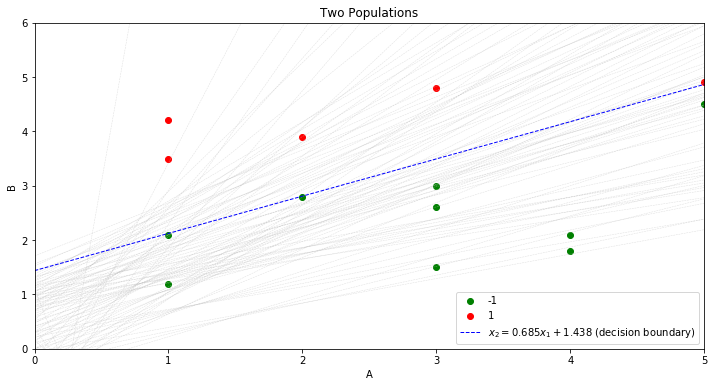

In [9]:
# set initial values
eta = 0.1
epoch = 1
debug = False
converged = False
w = np.array([np.random.randint(-5,5), 
              np.random.randint(-5,5),
              np.random.randint(-5,5)])


fig, ax = plt.subplots(figsize=[12,6])
ax.set_xlim(0,6)
ax.set_title("Two Populations")
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_xlim(0,5)
ax.set_ylim(0,6)

print('Initial: w = ' + str([i for i in w]))

while not converged:
    converged = True
    for i in df2.index:
        X = np.insert(np.array(df2.iloc[i][0:2]),0,1)
        y = np.array(df2.iloc[i][2])
        if debug:
            print('\nEpoch ' + str(epoch) + ', point ' + str(i) + 
                  '\n   X: ' + str(X) + 
                  '\n   w: ' + str(w) +
                  '\n   y: ' + str(y))
        if not y == predict(w, X):
            converged = False
            temp_x = -1*w[1]/w[2]
            temp_b = -1*w[0]/w[2]
            abline(temp_x, temp_b,'--',.5,.5,'silver')
            w = w + y * eta * X
        else:
            if debug:
                print('   No update for this point.')
    epoch = epoch + 1

print('Converged: w = ' + str([round(i,2) for i in w]))
print('Converged in epoch # ' + str(epoch) + ' after point # ' + str(i) + '.')

x = -1*w[1]/w[2]
b = -1*w[0]/w[2]
abline(x, b,'--b',1,1)

df2_a = df2.loc[df2.y < 0]
df2_b = df2.loc[df2.y > 0]

ax.scatter(x=df2_a.A, y=df2_a.B, c='g', label='-1')
ax.scatter(x=df2_b.A, y=df2_b.B, c='r', label='1')

line_eq = '$x_2 = ' + str(round(x,3)) + 'x_1 + ' + str(round(b,3)) + '$ (decision boundary)'

handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color='b', linestyle='--', lw=1, label=line_eq))
plt.legend(handles=handles)

plt.show()

<font color='#544640'>We finally arrive at a ***decision boundary*** which separates the two groups of data points. <br><br>
    
<center><img src='./img/every_time.gif' width=400><br></center><br><br><br>

<center>Makes sense now?</center></font><br><br><br>

<center><img src='./img/sense.gif' width=400><br></center><br><br>

<font color='#544640'>Run the next cell a few times (it will be different every time). Can you tell which cases would be linearly separable? How would you deal with the cases that were not linearly separable?</font><br><br>

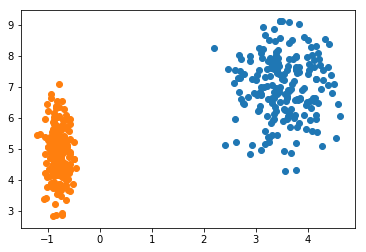

In [14]:
n = 200

offsetX1 = np.random.randint(-10,10)
offsetY1 = np.random.randint(-10,10)
offsetX2 = np.random.randint(-10,10)
offsetY2 = np.random.randint(-10,10)

spreadX1 = np.random.random()
spreadY1 = np.random.random()

spreadX2 = np.random.random()
spreadY2 = np.random.random()

X1 = np.random.normal(offsetX1,1,n) * spreadX1
Y1 = np.random.normal(offsetY1,1,n) * spreadY1

X2 = np.random.normal(offsetX2,1,n) * spreadX2
Y2 = np.random.normal(offsetY2,1,n) * spreadY2


plt.scatter(X1,Y1)
plt.scatter(X2,Y2)
plt.show()

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>

### <font color="#D21087">Multi-Layer Neural Networks</font>

<font color='#544640'>How did you answer the previous question about linear separability?
    
Now that we are <b>Masters of the Perceptron</b>, we can begin exploring neural networks, which are combinations of neurons chained together to achieve a specific result.

Because we are just beginning to explore NNs, development and innovation is going on every day and novel papers and techniques are uncovered and published with regularity. It was not until 2012 that a deep neural network, AlexNet, shattered records in a handwritten digit recognition competition, which is one of the precipitating events behind the explosion of Convolutional Neural Networks (CNN) and Deep Neural Networks (DNN).

Let's keep things simple. How would we build a classifier for the following distribution of two groups (red and green) in the following data points?<br><br>

<center><img src='./img/nonlinear_boundary.png' width=400><br></center><br><br>

By combining more than one perceptron, we can produce a non-linear decision boundary.<br><br>


<center><img src='./img/multiple_perceptron1.png' width=200><br></center><br><br>

<center><img src='./img/multiple_perceptron2.png' width=200><br></center><br><br>

Things just get wild from there! What do you think a network like this is capable of?<br><br>

<center><img src='./img/multilayer_nn.png' width=600><br></center><br><br>

How about this?<br><br>

<center><img src='./img/deep_nn.png' width=600><br></center><br><br>

Here is a simplified illustration of different flavors of Neural Networks comprised of varying types of cells, activation functions, layers, and topologies.<br><br>

Credit: https://www.asimovinstitute.org/author/fjodorvanveen/<br><br>

<center><img src='./img/nn_types.png' width=800><br></center><br><br>

<center><img src='./img/nn_graphs.png' width=1000><br></center><br><br>

These networks take a tremendous amount of data and compute resources to train. How much?

A tremendous amount. But the achievements of NN-driven machine learning are amazing. Only in recent years has this been possible - due to improvements to compute, data handling, storage, and thanks the development of the industry as a whole, which tends towards publishing and open-source projects.<br><br>

<center><img src='./img/training_data.png' width=800><br></center><br><br>

</font>

<br><br><font color="#B81590">$$\large-\infty-$$</font><br><br>